In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
def precise_model(X):
    return np.sin(2 * np.pi * X)

np.random.seed(1)

n_samples = 50

X = np.sort(np.random.rand(n_samples))
y = precise_model(X) + np.random.randn(n_samples) * 0.1

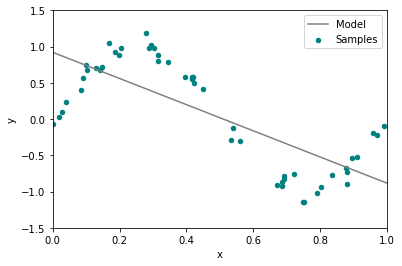

In [3]:
# Underfitting

polynomial_features = PolynomialFeatures(degree=1, include_bias=False)
    
linear_regression = LinearRegression()
model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
model.fit(X[:, np.newaxis], y)

scores = cross_val_score(model, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
y_prediction = model.predict(X_test[:, np.newaxis])
    
plt.plot(X_test, y_prediction, color = "grey", label = "Model")
    
plt.scatter(X, y, s=20, color = "teal", label = "Samples")
    
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
    
plt.show()

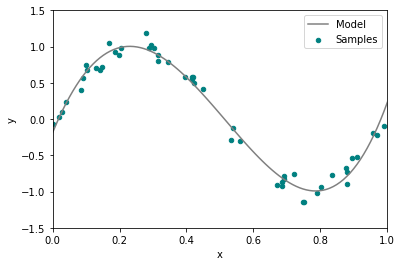

In [4]:
# Good Fitting

polynomial_features = PolynomialFeatures(degree=4, include_bias=False)
    
linear_regression = LinearRegression()
model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
model.fit(X[:, np.newaxis], y)

scores = cross_val_score(model, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
y_prediction = model.predict(X_test[:, np.newaxis])

plt.plot(X_test, y_prediction, color = "grey", label = "Model")
    
plt.scatter(X, y, s=20, color = "teal", label = "Samples")
    
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
    
plt.show()

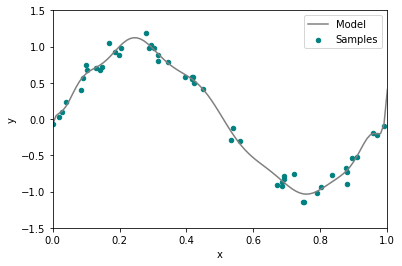

In [5]:
# Overfitting

polynomial_features = PolynomialFeatures(degree=15, include_bias=False)
    
linear_regression = LinearRegression()
model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
model.fit(X[:, np.newaxis], y)

scores = cross_val_score(model, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

X_test = np.linspace(0, 1, 100)
y_prediction = model.predict(X_test[:, np.newaxis])

plt.plot(X_test, y_prediction, color = "grey", label = "Model")
    
plt.scatter(X, y, s=20, color = "teal", label = "Samples")
    
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-1.5, 1.5))
plt.legend(loc="best")
    
plt.show()

In [6]:
# synthetic classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

(10000, 20) (10000,)


In [7]:
# split a dataset into train and test sets
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 20) (3000, 20) (7000,) (3000,)


In [8]:
# define the tree depths to evaluate
values = [i for i in range(1, 21)]

>1, train: 0.765, test: 0.762
>2, train: 0.812, test: 0.800
>3, train: 0.882, test: 0.878
>4, train: 0.901, test: 0.898
>5, train: 0.910, test: 0.907
>6, train: 0.930, test: 0.917
>7, train: 0.940, test: 0.919
>8, train: 0.952, test: 0.920
>9, train: 0.959, test: 0.919
>10, train: 0.969, test: 0.924
>11, train: 0.977, test: 0.921
>12, train: 0.983, test: 0.921
>13, train: 0.989, test: 0.914
>14, train: 0.992, test: 0.917
>15, train: 0.995, test: 0.918
>16, train: 0.997, test: 0.915
>17, train: 0.998, test: 0.917
>18, train: 0.999, test: 0.916
>19, train: 0.999, test: 0.913
>20, train: 1.000, test: 0.915


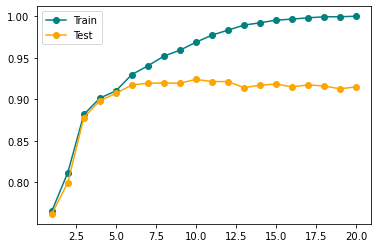

In [9]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = DecisionTreeClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
    # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', color='teal', label='Train')
pyplot.plot(values, test_scores, '-o', color='orange', label='Test')
pyplot.legend()
pyplot.show()